Paquetes necesarios

In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [21]:
#Dimensiones de la imagen a crear
ancho = 300
alto = 200

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

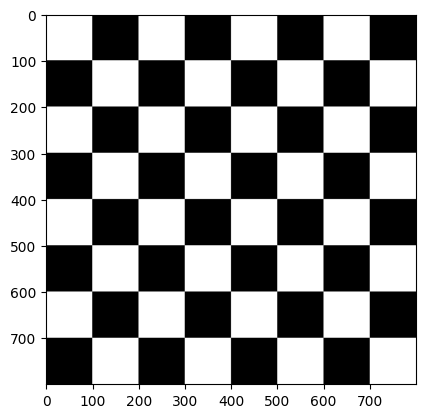

In [19]:
ajedrez_ancho_alto = 800
division = int(ajedrez_ancho_alto/8)
gris_img = np.zeros((ajedrez_ancho_alto,ajedrez_ancho_alto,1), dtype = np.uint8)

for j in range (0,8):
    for i in range(0,8):  
        if i%2 == 0:
            gris_img[j*division:j*division+100,i*division+((j%2)*100):i*division+100+((j%2)*100),0:2] = 255 
plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

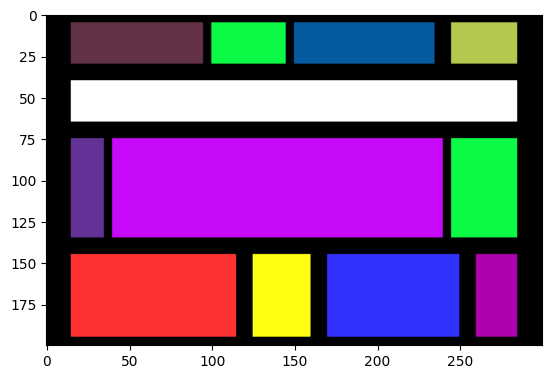

In [23]:
#Modifica el primer plano de color (Rojo, ya que es RGB)
def pintar_rectangulo(array, x, y, h, w, color):
    array[y:y+h,x:x+w,0] = color[0]
    array[y:y+h,x:x+w,1] = color[1]
    array[y:y+h,x:x+w,2] = color[2]
    return array
new_img = np.zeros((alto,ancho,3), dtype = np.uint8)
new_img = pintar_rectangulo(new_img, 15, 5, 25, 80, [100,50,70])
new_img = pintar_rectangulo(new_img, 100, 5, 25, 45, [10,250,70])
new_img = pintar_rectangulo(new_img, 150, 5, 25, 85, [5,90,160])
new_img = pintar_rectangulo(new_img, 245, 5, 25, 40, [180,200,80])

new_img = pintar_rectangulo(new_img, 15, 40, 25, 270, [255,255,255])

new_img = pintar_rectangulo(new_img, 15, 75, 60, 20, [100,50,150])
new_img = pintar_rectangulo(new_img, 40, 75, 60, 200, [200,10,250])
new_img = pintar_rectangulo(new_img, 245, 75, 60, 40, [10,250,70])

new_img = pintar_rectangulo(new_img, 15, 145, 50, 100, [255,50,50])
new_img = pintar_rectangulo(new_img, 125, 145, 50, 35, [255,255,20])
new_img = pintar_rectangulo(new_img, 170, 145, 50, 80, [50,50,255])
new_img = pintar_rectangulo(new_img, 260, 145, 50, 25, [175,1,175])

plt.imshow(new_img) 
plt.show()


TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

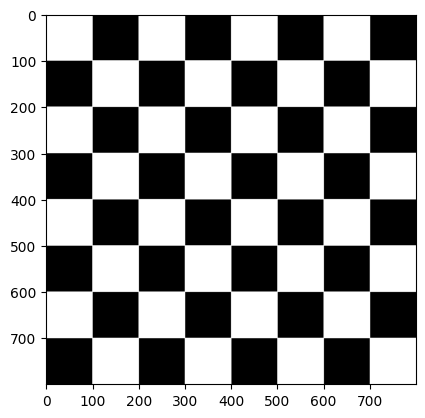

In [52]:
ajedrez_ancho_alto = 800
division = int(ajedrez_ancho_alto/8)
gris_img = np.zeros((ajedrez_ancho_alto,ajedrez_ancho_alto,3), dtype = np.uint8)


for j in range (0,8):
    for i in range(0,8):
        if i%2 == 0:
            if j%2 == 0:
                cv2.rectangle(gris_img,(i*100,j*100),(100+(i*100),100+(j*100)),(255,255,255),-1)
            else:
                cv2.rectangle(gris_img,((i*100)+100,j*100),(200+(i*100),100+(j*100)),(255,255,255),-1)

plt.imshow(gris_img) #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

Separa los tres planos de la imagen captada por la webcam y muestra en horizontal

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [24]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape
        #for i in b:
        #    i = 1-i
        b = 255 - b
        b = np.where(b > 150, 255, 0).astype(np.uint8)

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Evento de ratón para mostrar el valor RGB del píxel

In [5]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel, desde la webcam no es BGR
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  
        # Almacena valores del evento
        px = x
        py = y

     
  

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [6]:

vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0 #bandera para primer fotograma
px = -1
pos_darker_pix = [127,127]
pos_shiner_pix = [255,255]
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    frame = frame.astype(np.uint32)
    for i in range(0,480):
        for j in range(0,640):
            if sum(frame[i][j]) < sum(frame[pos_darker_pix[0],pos_darker_pix[1]]):
                pos_darker_pix[0] = i
                pos_darker_pix[1] = j
            if sum(frame[i][j]) > sum(frame[pos_shiner_pix[0],pos_shiner_pix[1]]):
                pos_shiner_pix[0] = i
                pos_shiner_pix[1] = j
    frame = frame.astype(np.uint8)
    cv2.circle(frame,(pos_shiner_pix[0],pos_shiner_pix[1]), 15, (255,0,255), 2)
    cv2.circle(frame,(pos_darker_pix[0],pos_darker_pix[1]), 15, (255,255,255), 2)
 
    
    
    if ret: 
        # Activa el manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

In [7]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0 #bandera para primer fotograma
px = -1

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    pos_darker_pix = [0,0]
    pos_shiner_pix = [0,0]
    suma_darker = 255*3*8
    suma_shiner = 0

    for i in range(0,len(frame),8):
        for j in range(0,len(frame[1]),8):
            subReg = frame[i:i+8,j:j+8].astype(np.uint16)
            suma = np.sum(subReg)
            if suma < suma_darker:
                suma_darker = suma
                pos_darker_pix[0] = i+3
                pos_darker_pix[1] = j+3
            if suma > suma_shiner:
                suma_shiner = suma
                pos_shiner_pix[0] = i+3
                pos_shiner_pix[1] = j+3

    cv2.circle(frame,(pos_darker_pix[0],pos_darker_pix[1]), 10, (255,0,0), 2)
    cv2.circle(frame,(pos_shiner_pix[0],pos_shiner_pix[1]), 10, (0,0,255), 2)

    if ret: 
        # Activa el manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
        cv2.imshow('Cam', frame)   
        # Detenemos pulsado ESC
        if cv2.waitKey(20) == 27:
            break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [25]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos con los valores de los planos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = np.where(255 - r > 150, 255, 0)
        tr[:,:,1] = 255
        tr[:,:,2] = 255
        
        bl[:,:,0] = 255
        bl[:,:,1] = np.where(255 - g > 150, 255, 0)
        bl[:,:,2] = 255

        br[:,:,0] = 255
        br[:,:,1] = 255
        br[:,:,2] = np.where(255 - b > 150, 255, 0)
    
        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()